# 0. Install and Import Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,SimpleRNN, LSTM, GRU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 1. Data Analysis

In [5]:
df = pd.read_csv("Electric_Production.csv")
df

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151
...,...,...
392,09-01-2017,98.6154
393,10-01-2017,93.6137
394,11-01-2017,97.3359
395,12-01-2017,114.7212


In [6]:
df = df.set_index("DATE")
df.index = pd.to_datetime(df.index, format='%d-%m-%Y')
# df = df.groupby(pd.Grouper(freq='m')).mean()
df

,Value
DATE,
1985-01-01,72.5052
1985-01-02,70.6720
1985-01-03,62.4502
1985-01-04,57.4714
1985-01-05,55.3151
...,...
2017-01-09,98.6154
2017-01-10,93.6137
2017-01-11,97.3359


Number of measurements: 397


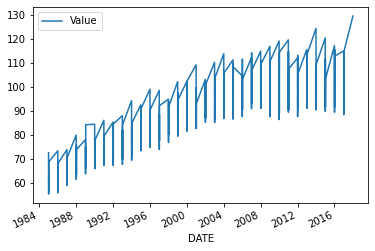

In [7]:
print("Number of measurements: "+str(len(df['Value'])))
df.plot(y='Value', rot=25);

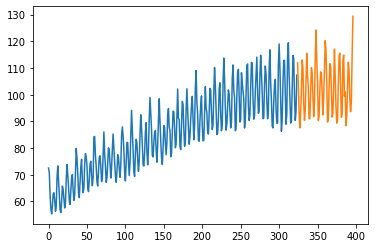

In [11]:
# Spliting the last 2 years for test

train = dftm[:12*27].values
plt.plot(np.arange(len(train)),train)
train = train.reshape((len(train), 1))
test = dftm[12*27:].values
plt.plot(np.arange(len(train), len(train)+len(test)),test)
test = test.reshape((len(test), 1))

In [12]:
length = 12
generator = TimeseriesGenerator(train,train,length=length, batch_size=1)
validation_generator = TimeseriesGenerator(test,test,length=length, batch_size=1)

In [13]:
print(train[:length+1])

[[72.5052]
 [70.672 ]
 [62.4502]
 [57.4714]
 [55.3151]
 [58.0904]
 [62.6202]
 [63.2485]
 [60.5846]
 [56.3154]
 [58.0005]
 [68.7145]
 [73.3057]]


In [14]:
# Looking some TimeSeriesGenerator results
i=0
for x,y in generator:
    print(x)
    print(y)
    i = i + 1
    if i == 2:
        break

[[[72.5052]
  [70.672 ]
  [62.4502]
  [57.4714]
  [55.3151]
  [58.0904]
  [62.6202]
  [63.2485]
  [60.5846]
  [56.3154]
  [58.0005]
  [68.7145]]]
[[73.3057]]
[[[70.672 ]
  [62.4502]
  [57.4714]
  [55.3151]
  [58.0904]
  [62.6202]
  [63.2485]
  [60.5846]
  [56.3154]
  [58.0005]
  [68.7145]
  [73.3057]]]
[[67.9869]]


# 2. RNN Model

In [17]:
model = Sequential()
model.add(SimpleRNN(10, activation='relu', input_shape=(length,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [18]:
epochs = 100
early_stop = EarlyStopping(monitor='val_loss',patience=10)
ckpt = ModelCheckpoint('model6.hdf5', save_best_only=True, monitor='val_loss', verbose=1)

history = model.fit_generator(
    generator,
    steps_per_epoch=len(generator),
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[early_stop, ckpt])

C:\Users\xaris\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
312/312 [==============================] - 2s 4ms/step - loss: 1757.1706 - val_loss: 99.5005

Epoch 00001: val_loss improved from inf to 99.50049, saving model to model6.hdf5
Epoch 2/100
312/312 [==============================] - 1s 4ms/step - loss: 62.1748 - val_loss: 112.1379

Epoch 00002: val_loss did not improve from 99.50049
Epoch 3/100
312/312 [==============================] - 1s 3ms/step - loss: 48.1730 - val_loss: 63.8377

Epoch 00003: val_loss improved from 99.50049 to 63.83769, saving model to model6.hdf5
Epoch 4/100
312/312 [==============================] - 1s 3ms/step - loss: 36.3696 - val_loss: 48.8108

Epoch 00004: val_loss improved from 63.83769 to 48.81077, saving model to model6.hdf5
Epoch 5/100
312/312 [==============================] - 1s 3ms/step - loss: 29.8766 - val_loss: 42.1663

Epoch 00005: val_loss improved from 48.81077 to 42.16628, saving model to model6.hdf5
Epoch 6/100
312/312 [==============================] - 1s 4ms/step - loss: 28.7876 - v

312/312 [==============================] - 1s 4ms/step - loss: 11.0056 - val_loss: 33.9395

Epoch 00050: val_loss did not improve from 17.35824
Epoch 51/100
312/312 [==============================] - 1s 3ms/step - loss: 10.9237 - val_loss: 21.3957

Epoch 00051: val_loss did not improve from 17.35824
Epoch 52/100
312/312 [==============================] - 1s 4ms/step - loss: 10.6980 - val_loss: 17.1174

Epoch 00052: val_loss improved from 17.35824 to 17.11736, saving model to model6.hdf5
Epoch 53/100
312/312 [==============================] - 1s 3ms/step - loss: 12.1533 - val_loss: 23.1956

Epoch 00053: val_loss did not improve from 17.11736
Epoch 54/100
312/312 [==============================] - 1s 4ms/step - loss: 12.3804 - val_loss: 18.6541

Epoch 00054: val_loss did not improve from 17.11736
Epoch 55/100
312/312 [==============================] - 1s 3ms/step - loss: 10.9966 - val_loss: 17.4796

Epoch 00055: val_loss did not improve from 17.11736
Epoch 56/100
312/312 [===============

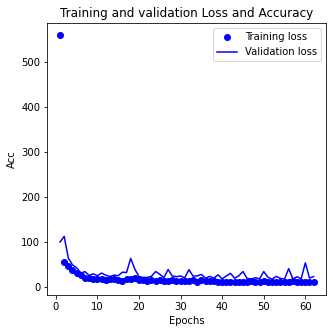

In [19]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs_x = range(1, len(loss_values) + 1)
plt.figure(figsize=(5,5))
#plt.subplot(2,1,1)
plt.plot(epochs_x, loss_values, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

## Evaluating

In [20]:
# Load the best model
model.load_weights("model6.hdf5")

# Predicting some days ahead.
test_predictions = []
first_eval_batch = train[-length:]
current_batch = first_eval_batch.reshape((1, length, 1))
for i in range(len(test)):
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    # store prediction
    test_predictions.append(current_pred)
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
#prediction = scaler.inverse_transform(test_predictions)

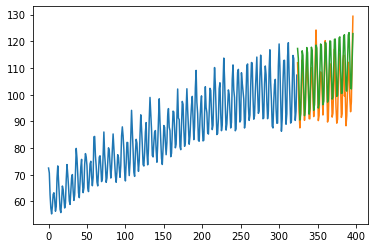

In [21]:
# Comparing test data and predictions

plt.plot(np.arange(len(train)), train)
plt.plot(np.arange(len(train),len(train)+len(test)),test)
plt.plot(np.arange(len(train),len(train)+len(test)),test_predictions)

In [22]:
# Calculating the mean squared error
loss = np.mean(np.square(test[:,0] - np.array(test_predictions)[:,0]), axis=-1)
print("mse: "+str(loss))

mse: 58.37310506338768


# 3. LSTM Model

In [24]:
model = Sequential()
model.add(LSTM(10, activation='relu', input_shape=(length,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [25]:
epochs = 100
early_stop = EarlyStopping(monitor='val_loss',patience=10)
ckpt = ModelCheckpoint('model7.hdf5', save_best_only=True, monitor='val_loss', verbose=1)

history = model.fit_generator(
    generator,
    steps_per_epoch=len(generator),
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[early_stop, ckpt])

C:\Users\xaris\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
312/312 [==============================] - 4s 7ms/step - loss: 6643.5592 - val_loss: 777.6080

Epoch 00001: val_loss improved from inf to 777.60797, saving model to model7.hdf5
Epoch 2/100
312/312 [==============================] - 2s 7ms/step - loss: 213.0072 - val_loss: 133.9670

Epoch 00002: val_loss improved from 777.60797 to 133.96700, saving model to model7.hdf5
Epoch 3/100
312/312 [==============================] - 2s 6ms/step - loss: 64.4823 - val_loss: 138.8721

Epoch 00003: val_loss did not improve from 133.96700
Epoch 4/100
312/312 [==============================] - 2s 6ms/step - loss: 63.8502 - val_loss: 110.0316

Epoch 00004: val_loss improved from 133.96700 to 110.03156, saving model to model7.hdf5
Epoch 5/100
312/312 [==============================] - 2s 6ms/step - loss: 66.1432 - val_loss: 108.6681

Epoch 00005: val_loss improved from 110.03156 to 108.66814, saving model to model7.hdf5
Epoch 6/100
312/312 [==============================] - 2s 5ms/step - loss

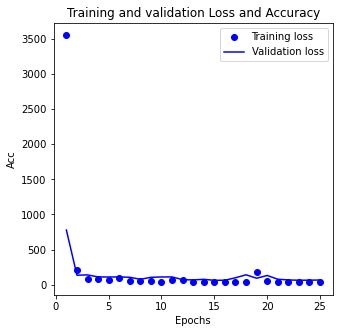

In [26]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs_x = range(1, len(loss_values) + 1)
plt.figure(figsize=(5,5))
#plt.subplot(2,1,1)
plt.plot(epochs_x, loss_values, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

## Evaluating

In [27]:
# Load the best model
model.load_weights("model7.hdf5")

# Predicting some days ahead.
test_predictions = []
first_eval_batch = train[-length:]
current_batch = first_eval_batch.reshape((1, length, 1))
for i in range(len(test)):
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    # store prediction
    test_predictions.append(current_pred)
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
#prediction = scaler.inverse_transform(test_predictions)

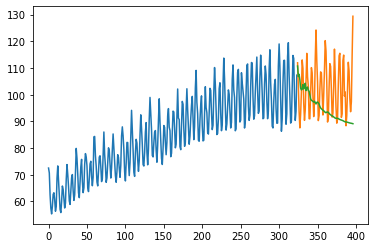

In [28]:
# Comparing test data and predictions

plt.plot(np.arange(len(train)), train)
plt.plot(np.arange(len(train),len(train)+len(test)),test)
plt.plot(np.arange(len(train),len(train)+len(test)),test_predictions)

In [29]:
# Calculating the mean squared error
loss2 = np.mean(np.square(test[:,0] - np.array(test_predictions)[:,0]), axis=-1)
print("mse: "+str(loss2))

mse: 185.61999714770127


# 4. GRU Model

In [34]:
model = Sequential()
model.add(GRU(20, activation='relu', return_sequences=True, input_shape=(length,1)))
model.add(GRU(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_6 (GRU)                  (None, 12, 20)            1380      
_________________________________________________________________
gru_7 (GRU)                  (None, 10)                960       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 2,351
Trainable params: 2,351
Non-trainable params: 0
_________________________________________________________________


In [35]:
epochs = 100
early_stop = EarlyStopping(monitor='val_loss',patience=10)
ckpt = ModelCheckpoint('model8.hdf5', save_best_only=True, monitor='val_loss', verbose=1)

history = model.fit_generator(
    generator,
    steps_per_epoch=len(generator),
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[early_stop, ckpt])

C:\Users\xaris\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
312/312 [==============================] - 10s 15ms/step - loss: 2717.8413 - val_loss: 96.2701

Epoch 00001: val_loss improved from inf to 96.27014, saving model to model8.hdf5
Epoch 2/100
312/312 [==============================] - 3s 11ms/step - loss: 57.9437 - val_loss: 96.5310

Epoch 00002: val_loss did not improve from 96.27014
Epoch 3/100
312/312 [==============================] - 3s 10ms/step - loss: 56.4849 - val_loss: 73.2701

Epoch 00003: val_loss improved from 96.27014 to 73.27009, saving model to model8.hdf5
Epoch 4/100
312/312 [==============================] - 3s 11ms/step - loss: 42.5218 - val_loss: 65.9658

Epoch 00004: val_loss improved from 73.27009 to 65.96582, saving model to model8.hdf5
Epoch 5/100
312/312 [==============================] - 4s 12ms/step - loss: 40.0809 - val_loss: 42.5997

Epoch 00005: val_loss improved from 65.96582 to 42.59972, saving model to model8.hdf5
Epoch 6/100
312/312 [==============================] - 3s 11ms/step - loss: 25.77

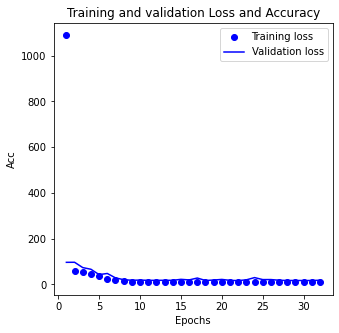

In [36]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs_x = range(1, len(loss_values) + 1)
plt.figure(figsize=(5,5))
#plt.subplot(2,1,1)
plt.plot(epochs_x, loss_values, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

## Evaluating

In [37]:
# Load the best model
model.load_weights("model8.hdf5")

# Predicting some days ahead.
test_predictions = []
first_eval_batch = train[-length:]
current_batch = first_eval_batch.reshape((1, length, 1))
for i in range(len(test)):
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    # store prediction
    test_predictions.append(current_pred)
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
#prediction = scaler.inverse_transform(test_predictions)

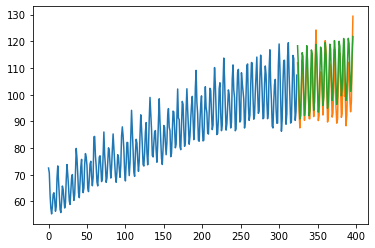

In [38]:
# Comparing test data and predictions

plt.plot(np.arange(len(train)), train)
plt.plot(np.arange(len(train),len(train)+len(test)),test)
plt.plot(np.arange(len(train),len(train)+len(test)),test_predictions)

In [39]:
# Calculating the mean squared error
loss3 = np.mean(np.square(test[:,0] - np.array(test_predictions)[:,0]), axis=-1)
print("mse: "+str(loss3))

mse: 38.06705408946133


# 5. Summary

In [42]:
Summary = {'Method':['RNN','LSTM','GRU'],
              'Mean Squared Error':[str(loss),str(loss2),str(loss3)]}

pd.DataFrame(Summary)

,Method,Mean Squared Error
0,RNN,58.37310506338768
1,LSTM,185.61999714770127
2,GRU,38.06705408946133
